In [30]:
import pandas as pd
df = pd.read_csv('insurance.csv')

In [31]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [35]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [36]:
df = df.join(pd.get_dummies(df['region'], prefix='region', drop_first=True, dtype=int)).drop(['region'], axis=1)

In [37]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'region_northwest'}>,
        <Axes: title={'center': 'region_southeast'}>,
        <Axes: title={'center': 'region_southwest'}>]], dtype=object)

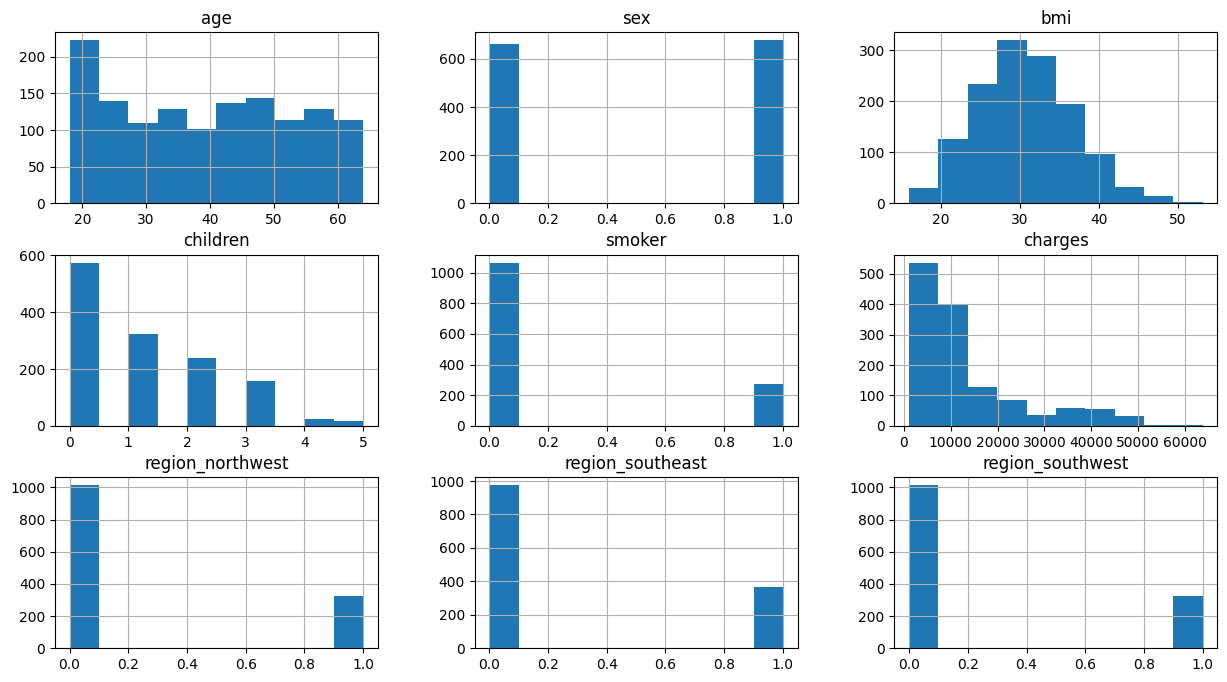

In [39]:
df.hist(figsize=(15, 8))

<Axes: >

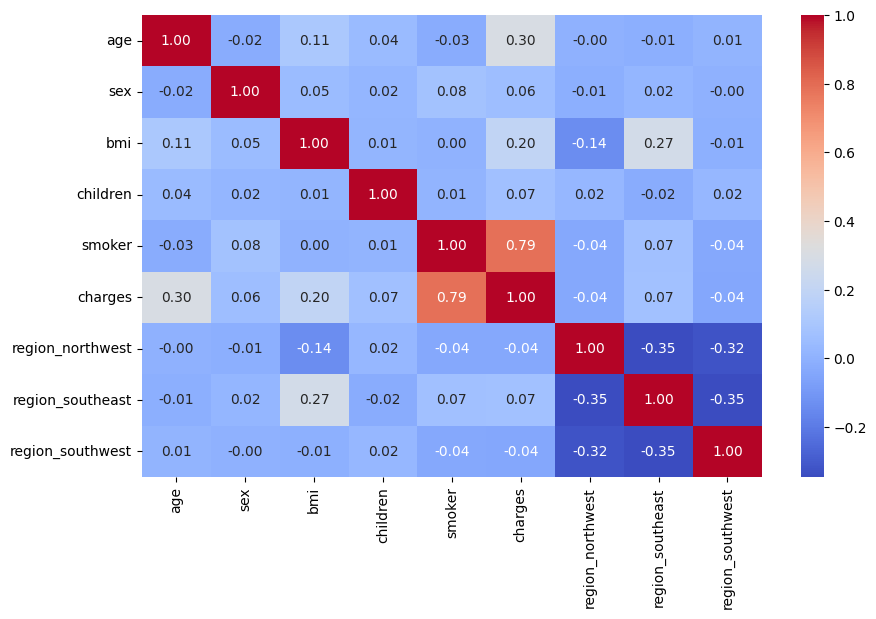

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [44]:
from sklearn.model_selection import train_test_split
X, y = df.drop('charges', axis=1), df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [46]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
model.score(X_test, y_test)

0.8650190975467524

In [48]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

4577.73021064823

In [50]:
y.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [51]:
mea = mean_absolute_error(y_test, y_pred)
mea

2550.85170664192

Text(0, 0.5, 'Predicted Charges')

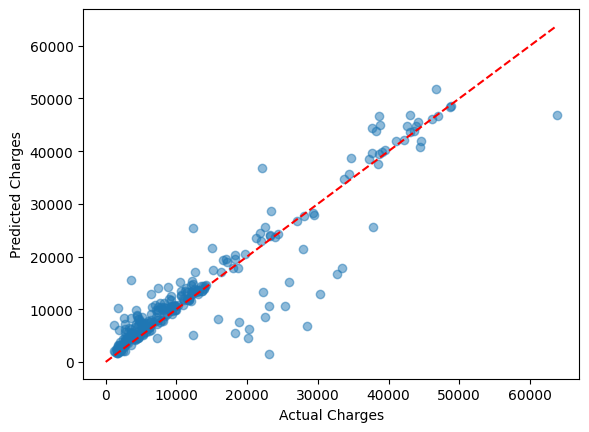

In [55]:
import numpy as np

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(0, max(y_test), 100), np.linspace(0, max(y_test), 100), color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

In [57]:
feature_importances = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)
feature_importances

[('smoker', np.float64(0.6086183615919195)),
 ('bmi', np.float64(0.21658413379860414)),
 ('age', np.float64(0.13415383566793634)),
 ('children', np.float64(0.01946491749319775)),
 ('sex', np.float64(0.006373283980882545)),
 ('region_northwest', np.float64(0.005602954432180698)),
 ('region_southeast', np.float64(0.005286704578928229)),
 ('region_southwest', np.float64(0.0039158084563506905))]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'smoker'),
  Text(1, 0, 'bmi'),
  Text(2, 0, 'age'),
  Text(3, 0, 'children'),
  Text(4, 0, 'sex'),
  Text(5, 0, 'region_northwest'),
  Text(6, 0, 'region_southeast'),
  Text(7, 0, 'region_southwest')])

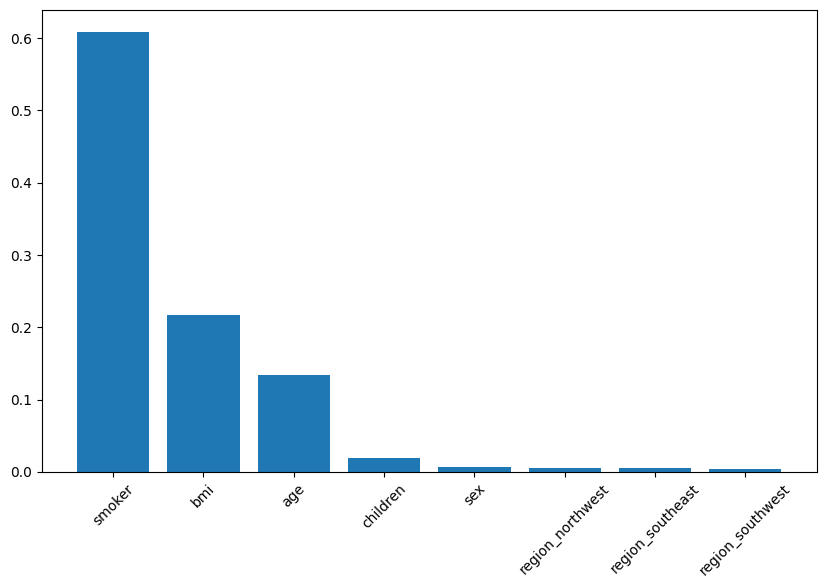

In [58]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.xticks(rotation=45)

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END ma

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [62]:
grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [63]:
model = grid.best_estimator_

In [64]:
model.score(X_test, y_test)

0.8774086387605872

In [66]:
rmse = root_mean_squared_error(y_test, model.predict(X_test))
rmse

4362.585623717729

In [67]:
mea = mean_absolute_error(y_test, model.predict(X_test))
mea

2480.1600977380563